In [1]:
## Data Analysis Process of the Prem League 24/25 Season

In [2]:
import pandas as pd

### Adding Main files
* 'team_stats' has stats on the team as a group
* 'standings' has ways to rank success, will change column names to keep it universal for all files
* 'team_salary' has each teams amount spent on players

In [3]:
team_stats = pd.read_csv('csv_files_used/team_stats.csv')

In [4]:
standings = pd.read_csv('csv_files_used/premier_league_stats_2024-25.csv')

In [5]:
team_salary = pd.read_csv('csv_files_used/team_salary.csv')

In [6]:
standings = standings.rename(columns={"Squad":"team","Rk":"rank","W":"win","L":"loss","D":"draw","GF":"goals","GA":"conceded","Pts":"points"})

In [7]:
standings = standings.drop(columns=['goals','MP','GD','Pts/MP','xG','xGA','xGD','xGD/90','Attendance','Top Team Scorer','Goalkeeper','Notes'])

### Normalized Annual Salary
* Mean player amount per team (61 players)
* Will drop the rest of the columns

In [8]:
team_salary['players'].agg('mean')

np.float64(61.0)

In [9]:
team_salary['newAnnual'] = team_salary['annual'] / team_salary['players']

In [10]:
team_salary['annual_normalized'] = (team_salary['newAnnual'] * 61)

In [11]:
team_salary['annual_normalized'] = round(team_salary['annual_normalized'] / 1e6,3)

In [12]:
# To clean up
team_salary.drop(columns=['players','weekly','annual','newAnnual'],inplace=True)

### Adding Salary to Team_stats
* Salary is an important variable of team success

In [13]:
team_stats = team_stats.merge(standings,on='team',how='outer')

In [14]:
team_stats = team_stats.merge(team_salary,on='team',how='outer')

### Columns dropped in 'team_stats'
* Age,Players,Yellows,Reds isn't meangingful data

In [15]:
new_column_order = ['team','rank','possession', 'goals', 'assists', 'expected_goals', 'expected_assists', 
    'progressive_carries', 'progressive_passes', 'penalty_kicks', 'penalty_kick_attempts', 
    'win', 'draw', 'loss', 'conceded', 'points',
    'annual_normalized'
]

In [16]:
team_stats = team_stats[new_column_order].sort_values(by='rank',ascending=True).reset_index(drop=True)

In [17]:
columns = ['possession','goals','annual_normalized','assists','conceded', 'penalty_kicks',
       'penalty_kick_attempts', 'progressive_carries', 'progressive_passes'
       ,'points']

In [18]:
team_stats[columns].corr().style.background_gradient(cmap='coolwarm')

,possession,goals,annual_normalized,assists,conceded,penalty_kicks,penalty_kick_attempts,progressive_carries,progressive_passes,points
possession,1.000000,0.609892,0.746470,0.623068,-0.392981,0.240899,0.287998,0.911283,0.925084,0.502695
goals,0.609892,1.000000,0.389608,0.974815,-0.706087,0.643140,0.603698,0.639954,0.805307,0.887417
annual_normalized,0.746470,0.389608,1.000000,0.426557,-0.582557,0.050619,0.011381,0.670447,0.707090,0.497320
assists,0.623068,0.974815,0.426557,1.000000,-0.698746,0.541091,0.523338,0.639672,0.805013,0.868700
conceded,-0.392981,-0.706087,-0.582557,-0.698746,1.000000,-0.482290,-0.420405,-0.442257,-0.615850,-0.908663
penalty_kicks,0.240899,0.643140,0.050619,0.541091,-0.482290,1.000000,0.930322,0.230834,0.460257,0.621819
penalty_kick_attempts,0.287998,0.603698,0.011381,0.523338,-0.420405,0.930322,1.000000,0.278873,0.465096,0.580545
progressive_carries,0.911283,0.639954,0.670447,0.639672,-0.442257,0.230834,0.278873,1.000000,0.903038,0.555286
progressive_passes,0.925084,0.805307,0.707090,0.805013,-0.615850,0.460257,0.465096,0.903038,1.000000,0.710133
points,0.502695,0.887417,0.497320,0.868700,-0.908663,0.621819,0.580545,0.555286,0.710133,1.000000


## Correlation Findings
* Possesion + prog_carries (0.911283) | prog_passes (0.925084)
* Annual + prog_carries(0.670447) | prog_passes(0.707090)
* Points + prog_carries(0.543832) | prog_passes(0.701386)
### Next
* Have data on players and their positions to find more specific areas with prog_carries and prog_passes
* Seeing if certain chareractices of a position or positions correlate with prog_passes and prog_carries

## Adding 'team_posseion' df into team_stats
* Will show me more catorgized correlation based on deffensive,middle,attacking touches

In [19]:
team_possession = pd.read_csv('csv_files_used/team_possession_stats.csv')


* Dropping duplicate column

In [20]:
team_possession = team_possession.drop(columns=['possession'])

### Merging
* Adding stats from 'team_possession' to 'team_stats'

In [21]:
team_stats = team_stats.merge(team_possession,on='team',how='outer')

### Check corr() with new columns

In [22]:
columns = [ 'points','possession', 'goals', 'assists', 'penalty_kicks',
       'penalty_kick_attempts', 'progressive_carries', 'progressive_passes',
       'conceded', 'annual_normalized', 'touches',
       'deffensive_touches', 'middle_touches', 'attacking_touches',
       'attempted_take_ons', 'successful_take_ons', 'carries',
       'total_distance_carried']

In [23]:
team_stats[columns].corr().style.background_gradient(cmap='RdPu')

,points,possession,goals,assists,penalty_kicks,penalty_kick_attempts,progressive_carries,progressive_passes,conceded,annual_normalized,touches,deffensive_touches,middle_touches,attacking_touches,attempted_take_ons,successful_take_ons,carries,total_distance_carried
points,1.000000,0.502695,0.887417,0.868700,0.621819,0.580545,0.555286,0.710133,-0.908663,0.497320,0.376739,-0.622175,0.339275,0.662261,0.061883,0.254025,0.317565,0.356896
possession,0.502695,1.000000,0.609892,0.623068,0.240899,0.287998,0.911283,0.925084,-0.392981,0.746470,0.964162,-0.099088,0.911300,0.865709,0.632106,0.643040,0.954784,0.934938
goals,0.887417,0.609892,1.000000,0.974815,0.643140,0.603698,0.639954,0.805307,-0.706087,0.389608,0.493168,-0.460896,0.421723,0.702740,0.188620,0.301506,0.454915,0.509021
assists,0.868700,0.623068,0.974815,1.000000,0.541091,0.523338,0.639672,0.805013,-0.698746,0.426557,0.493903,-0.476535,0.441823,0.693135,0.160207,0.272728,0.470719,0.513366
penalty_kicks,0.621819,0.240899,0.643140,0.541091,1.000000,0.930322,0.230834,0.460257,-0.482290,0.050619,0.184009,-0.166309,0.153323,0.265662,-0.076646,-0.036731,0.109998,0.108856
penalty_kick_attempts,0.580545,0.287998,0.603698,0.523338,0.930322,1.000000,0.278873,0.465096,-0.420405,0.011381,0.209506,-0.117222,0.173799,0.263546,-0.043384,-0.007806,0.157570,0.175158
progressive_carries,0.555286,0.911283,0.639954,0.639672,0.230834,0.278873,1.000000,0.903038,-0.442257,0.670447,0.874167,-0.346861,0.808858,0.939098,0.635673,0.708362,0.876875,0.939898
progressive_passes,0.710133,0.925084,0.805307,0.805013,0.460257,0.465096,0.903038,1.000000,-0.615850,0.707090,0.856472,-0.330097,0.776224,0.927853,0.448790,0.509584,0.838429,0.847313
conceded,-0.908663,-0.392981,-0.706087,-0.698746,-0.482290,-0.420405,-0.442257,-0.615850,1.000000,-0.582557,-0.272947,0.671882,-0.223307,-0.615454,0.061716,-0.106657,-0.222509,-0.249787
annual_normalized,0.497320,0.746470,0.389608,0.426557,0.050619,0.011381,0.670447,0.707090,-0.582557,1.000000,0.719251,-0.296499,0.674314,0.762058,0.313929,0.385168,0.702698,0.645070


In [24]:
team_stats = team_stats.sort_values(by='points',ascending=False).reset_index(drop=True)

### Adding 3 player DF's
* To find correlation between points and position metrics (including salaries).
* Will organize data by team and position.
* Creating 3 positions Defense,Midfield,Forward.

In [25]:
player_possession = pd.read_csv('csv_files_used/player_possession_stats.csv') 
player_stats = pd.read_csv('csv_files_used/player_stats.csv')
player_salaries = pd.read_csv('csv_files_used/player_salaries.csv')

In [26]:
player_stats = player_stats.drop(columns=['nation','team','position','age'])

In [27]:
player_stats.columns

Index(['name', 'born', 'played', 'starts', 'minutes', 'goals', 'assists',
       'penalty_kicks', 'penalty_kick_attempts', 'yellow', 'red',
       'expected_goals', 'progressive_carries', 'progressive_passes',
       'received_progressive_passes'],
      dtype='object')

In [28]:
player_stats = player_stats.rename(columns={'name':'player'})

In [29]:
player_stats.head()

,player,born,played,starts,minutes,goals,assists,penalty_kicks,penalty_kick_attempts,yellow,red,expected_goals,progressive_carries,progressive_passes,received_progressive_passes
0,Max Aarons,2000.0,3,1,86,0,0,0,0,0,0,0.0,1,8,3
1,Joshua Acheampong,2006.0,4,2,170,0,0,0,0,1,0,0.2,0,8,0
2,Tyler Adams,1999.0,27,20,1875,0,3,0,0,7,0,1.6,13,71,10
3,Tosin Adarabioyo,1997.0,21,14,1319,1,1,0,0,3,0,0.9,5,39,1
4,Simon Adingra,2002.0,28,11,1052,2,2,0,0,0,0,2.4,50,18,128


### Ran Script
* Created script 'match_salaries.ipynb'
* Takes salary data by name and matches it correctly with the names in 'team_possesion'
* Issue was: The name column used many alphabets making it hard to match

In [30]:
stats_per_game = pd.read_csv('csv_files_used/player_possession_with_salaries.csv')

In [31]:
stats_per_game.drop(columns=['nation','age','90s','touches'],inplace=True)

In [32]:
stats_per_game.value_counts().sum()

np.int64(571)

In [33]:
stats_per_game = stats_per_game.drop_duplicates(subset=['player'],keep='first')

In [34]:
stats_per_game = stats_per_game.merge(player_stats,on='player',how='left')

In [35]:
stats_per_game = stats_per_game.drop(columns=['yellow', 'red','born','starts','played'])

In [36]:
stats_per_game = stats_per_game[stats_per_game['position'] != 'GK'].copy()
print(f"\nRemaining positions:\n{stats_per_game['position'].value_counts()}")


Remaining positions:
position
DF       185
MF       112
FW        81
FW,MF     64
MF,FW     44
DF,MF     17
MF,DF     13
FW,DF      6
DF,FW      6
Name: count, dtype: int64


In [37]:
POSITION_MAP = {
    "FW,MF": "FW",
    "MF,FW": "MF",
    "DF,FW": "DF",
    "FW,DF": "FW",  
    "DF,MF": "DF",
    "MF,DF": "MF",
}

# Normalize position column
stats_per_game["position"] = (
    stats_per_game["position"]
    .map(POSITION_MAP)
    .fillna(stats_per_game["position"])
)

In [38]:
stats_per_game.drop(columns='player',inplace=True)

In [39]:
position_sorted_by_team = stats_per_game.groupby(by=['team','position']).agg('sum')

In [40]:
position_sorted_by_team.reset_index(inplace=True)

In [41]:
position_sorted_by_team.columns

Index(['team', 'position', 'deffensive_touches', 'middle_touches',
       'attacking_touches', 'attempted_take_ons', 'successful_take_ons',
       'takeons_tackled', 'carries', 'total_distance_carried', 'received',
       'Annual', 'minutes', 'goals', 'assists', 'penalty_kicks',
       'penalty_kick_attempts', 'expected_goals', 'progressive_carries',
       'progressive_passes', 'received_progressive_passes'],
      dtype='object')

### Seperating by Team
* Since I have three positions, I'll create seperate DF's for them

In [42]:
# Defense

In [43]:
defense_df = (
    position_sorted_by_team
        .loc[position_sorted_by_team['position'] == 'DF']
        .merge(standings[['team', 'points']], on='team', how='left')
        .sort_values(by='points', ascending=False)
        .reset_index(drop=True)
)

In [44]:
defense_df = pd.merge(defense_df,team_stats[['team','conceded']],how='left')

In [45]:
# Midfield

In [46]:
midfield_df = (position_sorted_by_team.loc[position_sorted_by_team['position'] == 'MF']
               .merge(standings[['team','points']],on='team',how='left')
               .sort_values(by='points',ascending=False)
               .reset_index(drop=True)
              )

In [47]:
midfield_df = pd.merge(midfield_df,team_stats[['team','conceded']],how='left')

In [48]:
# Forward

In [49]:
forward_df = (position_sorted_by_team.loc[position_sorted_by_team['position'] == 'FW']
              .merge(standings[['team','points']],on='team',how='left')
              .sort_values(by='points',ascending=False)
              .reset_index(drop=True)
             )

In [50]:
forward_df = pd.merge(forward_df,team_stats[['team','conceded']],how='left')

## Correlation by Position
### Defense Correlation

In [51]:
df_columns = ['points','Annual','expected_goals','conceded','carries','deffensive_touches','attempted_take_ons',
              'assists','successful_take_ons','takeons_tackled','progressive_carries',
              'progressive_passes','received_progressive_passes','total_distance_carried', 'middle_touches',
       'attacking_touches',
             ]

In [52]:
threshold = 0.4

In [53]:
defense_corr = defense_df[df_columns].corr()

In [54]:
defense_corr.where(defense_corr.abs() >= threshold).style.background_gradient(cmap='RdPu',vmin=-1,vmax=1)

,points,Annual,expected_goals,conceded,carries,deffensive_touches,attempted_take_ons,assists,successful_take_ons,takeons_tackled,progressive_carries,progressive_passes,received_progressive_passes,total_distance_carried,middle_touches,attacking_touches
points,1.000000,0.424988,nan,-0.908663,nan,-0.514604,nan,nan,nan,nan,nan,0.491408,nan,nan,nan,nan
Annual,0.424988,1.000000,0.512576,-0.485624,0.660178,nan,nan,nan,nan,nan,nan,0.600423,nan,0.575927,0.652752,0.617227
expected_goals,nan,0.512576,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
conceded,-0.908663,-0.485624,nan,1.000000,nan,0.580530,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
carries,nan,0.660178,nan,nan,1.000000,nan,nan,nan,nan,nan,0.700750,0.789309,0.506877,0.951412,0.934611,0.818826
deffensive_touches,-0.514604,nan,nan,0.580530,nan,1.000000,nan,nan,nan,0.435268,nan,nan,nan,nan,nan,nan
attempted_take_ons,nan,nan,nan,nan,nan,nan,1.000000,nan,0.981332,0.965374,0.603441,nan,0.666824,nan,nan,nan
assists,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,0.408598,nan,nan,nan
successful_take_ons,nan,nan,nan,nan,nan,nan,0.981332,nan,1.000000,0.911058,0.614233,nan,0.660974,nan,nan,nan
takeons_tackled,nan,nan,nan,nan,nan,0.435268,0.965374,nan,0.911058,1.000000,0.574481,nan,0.664481,nan,nan,nan


### Midfield Correlation

In [55]:
mf_columns = ['points','Annual','expected_goals','conceded','assists','deffensive_touches', 'middle_touches',
       'attacking_touches','attempted_take_ons','successful_take_ons',
              'takeons_tackled','carries','total_distance_carried','received','progressive_carries',
              'progressive_passes', 'received_progressive_passes'
             ]

In [56]:
midfield_corr = midfield_df[mf_columns].corr()

In [57]:
midfield_corr.where(midfield_corr.abs() >= threshold).style.background_gradient(cmap='RdPu',vmin=-1,vmax=1)

,points,Annual,expected_goals,conceded,assists,deffensive_touches,middle_touches,attacking_touches,attempted_take_ons,successful_take_ons,takeons_tackled,carries,total_distance_carried,received,progressive_carries,progressive_passes,received_progressive_passes
points,1.000000,nan,nan,-0.908663,0.500562,-0.483837,nan,nan,nan,-0.409971,-0.408540,nan,nan,nan,nan,0.533132,nan
Annual,nan,1.000000,0.613902,nan,0.423683,nan,0.687166,0.822477,nan,nan,nan,0.821569,0.720331,0.845946,0.630221,0.676607,0.681498
expected_goals,nan,0.613902,1.000000,nan,0.686302,nan,0.734616,0.687716,0.480723,nan,0.514533,0.697482,0.647726,0.678349,0.688219,0.718610,0.779750
conceded,-0.908663,nan,nan,1.000000,-0.492473,0.493676,nan,nan,nan,0.449469,nan,nan,nan,nan,nan,-0.521324,nan
assists,0.500562,0.423683,0.686302,-0.492473,1.000000,nan,0.468220,0.692051,nan,nan,nan,0.586478,0.569182,0.531369,0.642075,0.755259,0.703977
deffensive_touches,-0.483837,nan,nan,0.493676,nan,1.000000,0.517399,nan,0.447320,0.403433,0.480264,nan,nan,nan,nan,nan,nan
middle_touches,nan,0.687166,0.734616,nan,0.468220,0.517399,1.000000,0.652017,0.448199,nan,0.463050,0.837365,0.729794,0.883884,0.659846,0.643490,0.696441
attacking_touches,nan,0.822477,0.687716,nan,0.692051,nan,0.652017,1.000000,nan,nan,0.428304,0.905781,0.891229,0.876629,0.838973,0.793429,0.886137
attempted_take_ons,nan,nan,0.480723,nan,nan,0.447320,0.448199,nan,1.000000,0.969050,0.963746,0.444627,0.589613,nan,0.674563,nan,0.603567
successful_take_ons,-0.409971,nan,nan,0.449469,nan,0.403433,nan,nan,0.969050,1.000000,0.889500,nan,0.480058,nan,0.575082,nan,0.468717


### Forward Correlation

In [58]:
fw_columns = ['points','Annual','expected_goals','conceded','assists','deffensive_touches', 'middle_touches',
       'attacking_touches','attempted_take_ons','successful_take_ons',
              'takeons_tackled','carries','total_distance_carried','received','progressive_carries',
              'progressive_passes', 'received_progressive_passes'
             ]

In [59]:
forward_corr = forward_df[fw_columns].corr()

In [60]:
forward_corr.where(forward_corr.abs() >= threshold).style.background_gradient(cmap='RdPu',vmin=-1,vmax=1)

,points,Annual,expected_goals,conceded,assists,deffensive_touches,middle_touches,attacking_touches,attempted_take_ons,successful_take_ons,takeons_tackled,carries,total_distance_carried,received,progressive_carries,progressive_passes,received_progressive_passes
points,1.000000,0.534291,0.718863,-0.908663,0.695607,nan,nan,0.639888,nan,0.461125,nan,0.505352,0.531518,0.528704,0.639748,0.555596,0.688472
Annual,0.534291,1.000000,0.437033,-0.583371,0.581184,nan,nan,0.611526,0.617933,0.603013,0.528138,0.559579,0.585906,0.562043,0.661264,0.462523,0.678966
expected_goals,0.718863,0.437033,1.000000,-0.602265,0.822578,0.425870,0.607683,0.832365,0.616674,0.650244,0.567117,0.785995,0.772309,0.787928,0.758490,0.812972,0.886589
conceded,-0.908663,-0.583371,-0.602265,1.000000,-0.511351,nan,nan,-0.588594,nan,-0.410068,nan,-0.454408,-0.462098,-0.482982,-0.557397,-0.493278,-0.595241
assists,0.695607,0.581184,0.822578,-0.511351,1.000000,nan,0.602299,0.841509,0.658136,0.665733,0.586145,0.818890,0.813035,0.818862,0.828657,0.846111,0.905428
deffensive_touches,nan,nan,0.425870,nan,nan,1.000000,0.869349,0.590966,0.590237,0.523556,0.625414,0.681428,0.623618,0.684777,0.468116,0.613002,0.449555
middle_touches,nan,nan,0.607683,nan,0.602299,0.869349,1.000000,0.794112,0.781704,0.723082,0.812417,0.891755,0.833188,0.895196,0.682921,0.830237,0.691448
attacking_touches,0.639888,0.611526,0.832365,-0.588594,0.841509,0.590966,0.794112,1.000000,0.863317,0.878135,0.776164,0.973076,0.974149,0.973322,0.946520,0.895787,0.958946
attempted_take_ons,nan,0.617933,0.616674,nan,0.658136,0.590237,0.781704,0.863317,1.000000,0.965882,0.946499,0.881414,0.912300,0.876145,0.883229,0.692773,0.818237
successful_take_ons,0.461125,0.603013,0.650244,-0.410068,0.665733,0.523556,0.723082,0.878135,0.965882,1.000000,0.844704,0.867118,0.918734,0.865720,0.907514,0.703756,0.817499


## Whats been done so far
* For each position I checked correlation for points,annual,goals,assists.
* This helped me better understand how none obvious staticits correlate with those main stats such as Goals,Assists,Conceded.
* Scale was 0.4 > and -0.4 < - to find the main correlation.


### Whats next
* Will group these stats into buckets, again per team to see what correlates with the points
* Bucket 1: Defensive - (defense_touches,takeons_tackled)
* Bucket 2: Ball Progression - (prog_passes,prog,carries,received_prog_passes)
* Bucket 3: Attacking Involvement - (attacking_touches,expected_goals,assists,goals)
* Bucket 4: Ball Carrying & Territory Gain - (carries,total_distance_carried)
* Bucket 5: Central Connectivity / Control - (middle_touches,received)

In [61]:
# Aggregated by 90min(Game)
per90Cols = ['deffensive_touches','middle_touches','attacking_touches','attempted_take_ons','successful_take_ons',
 'takeons_tackled','carries','total_distance_carried','received','goals','assists','expected_goals',
 'progressive_carries','progressive_passes','received_progressive_passes','Annual']

In [62]:
defense_per_90 = defense_df.copy()

for col in per90Cols:
    defense_per_90[col] = (defense_per_90[col] / defense_per_90['minutes']) * 90

In [63]:
midfield_per_90 = midfield_df.copy()

for cols in per90Cols:
    midfield_per_90[cols] = (midfield_per_90[cols] / midfield_per_90['minutes']) * 90

In [64]:
forward_per_90 = forward_df.copy()

for cols in per90Cols:
    forward_per_90[cols] = (forward_per_90[cols] / forward_per_90['minutes']) * 90

In [65]:
defense_per_90['defensive_involvement_defense'] = (defense_per_90['deffensive_touches'] + defense_per_90['takeons_tackled'])
defense_per_90['ball_progression_defense'] = (
    defense_per_90['progressive_passes'] +
    defense_per_90['progressive_carries'] +
    defense_per_90['received_progressive_passes']
)
defense_per_90['attacking_involvement_defense'] = (
    defense_per_90['attacking_touches'] +
    defense_per_90['expected_goals'] +
    defense_per_90['goals'] +
    defense_per_90['assists']
)
defense_per_90['ball_carrying_defense'] = (
    defense_per_90['carries'] +
    defense_per_90['total_distance_carried']
)
defense_per_90['central_connectivity_defense'] = (
    defense_per_90['middle_touches'] +
    defense_per_90['received']
)

In [66]:
defense_per_90 = defense_per_90.rename(columns={'Annual':'pay_per_90'})

In [67]:
midfield_per_90['defensive_involvement_midfield'] = (midfield_per_90['deffensive_touches'] + midfield_per_90['takeons_tackled'])
midfield_per_90['ball_progression_midfield'] = (
    midfield_per_90['progressive_passes'] +
    midfield_per_90['progressive_carries'] +
    midfield_per_90['received_progressive_passes']
)
midfield_per_90['attacking_involvement_midfield'] = (
    midfield_per_90['attacking_touches'] +
    midfield_per_90['expected_goals'] +
    midfield_per_90['goals'] +
    midfield_per_90['assists']
)
midfield_per_90['ball_carrying_midfield'] = (
    midfield_per_90['carries'] +
    midfield_per_90['total_distance_carried']
)
midfield_per_90['central_connectivity_midfield'] = (
    midfield_per_90['middle_touches'] +
    midfield_per_90['received']
)

In [68]:
midfield_per_90 = midfield_per_90.rename(columns={'Annual':'pay_per_90'})

In [69]:
forward_per_90['defensive_involvement_forward'] = (forward_per_90['deffensive_touches'] + forward_per_90['takeons_tackled'])
forward_per_90['ball_progression_forward'] = (
    forward_per_90['progressive_passes'] +
    forward_per_90['progressive_carries'] +
    forward_per_90['received_progressive_passes']
)
forward_per_90['attacking_involvement_forward'] = (
    forward_per_90['attacking_touches'] +
    forward_per_90['expected_goals'] +
    forward_per_90['goals'] +
    forward_per_90['assists']
)
forward_per_90['ball_carrying_forward'] = (
    forward_per_90['carries'] +
    forward_per_90['total_distance_carried']
)
forward_per_90['central_connectivity_forward'] = (
    forward_per_90['middle_touches'] +
    forward_per_90['received']
)

In [70]:
forward_per_90 = forward_per_90.rename(columns={'Annual':'pay_per_90'})

### Looking at correlation between positional buckets and points

In [71]:
df_columns = ['points','defensive_involvement_defense', 'ball_progression_defense',
       'attacking_involvement_defense', 'ball_carrying_defense',
       'central_connectivity_defense']

In [72]:
defense_per_90[df_columns].corr()

,points,defensive_involvement_defense,ball_progression_defense,attacking_involvement_defense,ball_carrying_defense,central_connectivity_defense
points,1.000000,-0.282256,0.524598,0.488103,0.320119,0.381859
defensive_involvement_defense,-0.282256,1.000000,0.112334,-0.017826,0.325182,0.326728
ball_progression_defense,0.524598,0.112334,1.000000,0.910760,0.898540,0.821446
attacking_involvement_defense,0.488103,-0.017826,0.910760,1.000000,0.840782,0.820555
ball_carrying_defense,0.320119,0.325182,0.898540,0.840782,1.000000,0.900095
central_connectivity_defense,0.381859,0.326728,0.821446,0.820555,0.900095,1.000000


In [73]:
mf_columns = ['points','defensive_involvement_midfield', 'ball_progression_midfield',
       'attacking_involvement_midfield', 'ball_carrying_midfield',
       'central_connectivity_midfield']

In [74]:
midfield_per_90[mf_columns].corr()

,points,defensive_involvement_midfield,ball_progression_midfield,attacking_involvement_midfield,ball_carrying_midfield,central_connectivity_midfield
points,1.000000,-0.512120,0.482220,0.552723,0.277533,0.403962
defensive_involvement_midfield,-0.512120,1.000000,-0.427632,-0.505029,-0.307276,-0.071427
ball_progression_midfield,0.482220,-0.427632,1.000000,0.898280,0.891404,0.684368
attacking_involvement_midfield,0.552723,-0.505029,0.898280,1.000000,0.849559,0.686634
ball_carrying_midfield,0.277533,-0.307276,0.891404,0.849559,1.000000,0.793591
central_connectivity_midfield,0.403962,-0.071427,0.684368,0.686634,0.793591,1.000000


In [75]:
fw_columns = ['points','defensive_involvement_forward', 'ball_progression_forward',
       'attacking_involvement_forward', 'ball_carrying_forward',
       'central_connectivity_forward']

In [76]:
forward_per_90[fw_columns].corr()

,points,defensive_involvement_forward,ball_progression_forward,attacking_involvement_forward,ball_carrying_forward,central_connectivity_forward
points,1.000000,-0.265811,0.719617,0.685996,0.463489,0.338293
defensive_involvement_forward,-0.265811,1.000000,0.045554,0.186399,0.353688,0.449642
ball_progression_forward,0.719617,0.045554,1.000000,0.936305,0.888048,0.681615
attacking_involvement_forward,0.685996,0.186399,0.936305,1.000000,0.925589,0.797881
ball_carrying_forward,0.463489,0.353688,0.888048,0.925589,1.000000,0.830397
central_connectivity_forward,0.338293,0.449642,0.681615,0.797881,0.830397,1.000000


In [77]:
defense_per_90 = defense_per_90.merge(standings[['team','rank']],on='team')

In [78]:
midfield_per_90 = midfield_per_90.merge(standings[['team','rank']],on='team')

In [79]:
forward_per_90 = forward_per_90.merge(standings[['team','rank']],on='team')

In [80]:
df_cols = [
    'defensive_involvement_defense',
    'ball_progression_defense',
    'attacking_involvement_defense',
    'ball_carrying_defense',
    'central_connectivity_defense'
]

In [81]:
mf_cols = [
    'defensive_involvement_midfield',
    'ball_progression_midfield',
    'attacking_involvement_midfield',
    'ball_carrying_midfield',
    'central_connectivity_midfield'
]

In [82]:
fw_cols = [
    'defensive_involvement_forward',
    'ball_progression_forward',
    'attacking_involvement_forward',
    'ball_carrying_forward',
    'central_connectivity_forward'
]

In [83]:
forward_per_90[fw_cols + ['rank']].corr(method='spearman')['rank']

defensive_involvement_forward    0.302256
ball_progression_forward        -0.778947
attacking_involvement_forward   -0.784962
ball_carrying_forward           -0.676692
central_connectivity_forward    -0.494737
rank                             1.000000
Name: rank, dtype: float64

In [84]:
midfield_per_90[mf_cols + ['rank']].corr(method='spearman')['rank']

defensive_involvement_midfield    0.590977
ball_progression_midfield        -0.514286
attacking_involvement_midfield   -0.660150
ball_carrying_midfield           -0.341353
central_connectivity_midfield    -0.403008
rank                              1.000000
Name: rank, dtype: float64

In [85]:
defense_per_90[df_cols + ['rank']].corr(method='spearman')['rank']

defensive_involvement_defense    0.219549
ball_progression_defense        -0.521805
attacking_involvement_defense   -0.542857
ball_carrying_defense           -0.314286
central_connectivity_defense    -0.452632
rank                             1.000000
Name: rank, dtype: float64

### Merge
* Here I combined each bucket per position into the main file combined with team_stats df

In [86]:
# Merge them into one 'master_df' for easy plotting
master_df = team_stats.merge(defense_per_90[['team', 'defensive_involvement_defense',
    'ball_progression_defense',
    'attacking_involvement_defense',
    'ball_carrying_defense',
    'central_connectivity_defense']], on='team').sort_values('rank',ascending=True)
master_df = master_df.merge(midfield_per_90[['team', 'defensive_involvement_midfield',
    'ball_progression_midfield',
    'attacking_involvement_midfield',
    'ball_carrying_midfield',
    'central_connectivity_midfield']], on='team').sort_values('rank',ascending=True)
master_df = master_df.merge(forward_per_90[['team', 'defensive_involvement_forward',
    'ball_progression_forward',
    'attacking_involvement_forward',
    'ball_carrying_forward',
    'central_connectivity_forward']], on='team').sort_values('rank',ascending=True)

# Add the Tier group
master_df['tier'] = pd.cut(master_df['rank'], bins=[-1, 7, 15, 21], labels=['Top 7', 'Mid 8-14', 'Bottom 5'])

In [87]:
cols_to_90 = ['progressive_passes', 'progressive_carries', 'expected_goals', 
               'attacking_touches', 'middle_touches', 'goals']
for col in cols_to_90:
    master_df[f'{col}_p90'] = master_df[col] / 38

In [88]:
pd.set_option("display.max_columns",None)

In [89]:
master_df.head()

,team,rank,possession,goals,assists,expected_goals,expected_assists,progressive_carries,progressive_passes,penalty_kicks,penalty_kick_attempts,win,draw,loss,conceded,points,annual_normalized,touches,deffensive_touches,middle_touches,attacking_touches,attempted_take_ons,successful_take_ons,carries,total_distance_carried,defensive_involvement_defense,ball_progression_defense,attacking_involvement_defense,ball_carrying_defense,central_connectivity_defense,defensive_involvement_midfield,ball_progression_midfield,attacking_involvement_midfield,ball_carrying_midfield,central_connectivity_midfield,defensive_involvement_forward,ball_progression_forward,attacking_involvement_forward,ball_carrying_forward,central_connectivity_forward,tier,progressive_passes_p90,progressive_carries_p90,expected_goals_p90,attacking_touches_p90,middle_touches_p90,goals_p90
0,Liverpool,1,57.4,84,64,80.0,59.6,801,1846,9,9,25,9,4,41,84,175.795,25092,7133,11187,6995,661,295,14444,73791,28.926102,9.194961,13.692195,258.820863,94.749578,11.861743,10.603548,20.307270,208.799653,79.422484,4.841367,17.626602,26.579927,202.559487,45.512508,Top 7,48.578947,21.078947,2.105263,184.078947,294.394737,2.210526
1,Arsenal,2,56.8,65,53,57.6,43.2,830,1764,2,2,20,14,4,34,74,272.028,23363,5960,10107,7471,706,310,13816,73408,21.263125,7.747838,12.845429,212.450587,84.267295,10.681339,12.273138,23.280977,246.168224,75.076877,5.548466,16.805855,27.272778,202.861030,43.517876,Top 7,46.421053,21.842105,1.515789,196.605263,265.973684,1.710526
2,Manchester City,3,61.6,69,51,65.2,52.5,1112,1890,2,3,21,8,9,44,71,270.993,27459,6350,11762,9571,780,370,17678,101274,22.728305,10.588235,19.901157,338.427588,103.889874,10.679612,13.276699,32.550971,308.673139,92.597087,4.171102,17.782682,30.473582,262.335454,45.998961,Top 7,49.736842,29.263158,1.715789,251.868421,309.526316,1.815789
3,Chelsea,4,57.3,60,46,66.7,51.6,848,1573,4,5,20,9,9,43,69,198.519,24671,7379,11139,6367,769,322,14242,76825,29.104141,6.715182,10.726223,233.209536,92.544542,11.101902,11.154559,19.971136,229.252072,79.538762,6.058402,16.081967,25.255328,227.148566,46.014344,Top 7,41.394737,22.315789,1.755263,167.552632,293.131579,1.578947
4,Newcastle Utd,5,50.9,66,50,62.6,45.2,727,1541,5,6,20,6,12,47,66,136.402,22350,7319,9347,5905,644,277,12632,68484,29.635135,7.087838,10.923649,215.452703,74.013514,12.448860,9.985389,17.193454,208.123904,68.372297,6.005595,14.995337,23.378924,199.201119,45.657445,Top 7,40.552632,19.131579,1.647368,155.394737,245.973684,1.736842


### Adding Ploting Libraries

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [92]:
buckets = ['defensive_involvement', 'ball_progression', 'attacking_involvement', 'ball_carrying', 'central_connectivity']
positions = ['defense', 'midfield', 'forward']

# Create a matrix for the heatmap
heatmap_data = []

for bucket in buckets:
    row = []
    for pos in positions:
        col_name = f"{bucket}_{pos}"
        if col_name in master_df.columns:
            # Calculate correlation with points
            corr = master_df[col_name].corr(master_df['points'])
            row.append(corr)
        else:
            row.append(0)
    heatmap_data.append(row)

heatmap_df = pd.DataFrame(heatmap_data, index=buckets, columns=['Defense', 'Midfield', 'Forward'])

In [93]:
fig = px.imshow(
    heatmap_df,
    text_auto=".1f",               
    color_continuous_scale='RdYlGn', 
    range_color=[0, 1],             
    labels=dict(x="Player Position Group", y="Tactical Bucket", color="Correlation"),
    title='Correlation with Points: Tactical Bucket vs. Position<br><sup>(Darker Green = Stronger Link to Winning)</sup>'
)
fig.show()

### Spending and Points Plot
* Shows the direct relationship between a club's annual wage spend and their final league points.
* It highlights which teams are over-performing their budget, versus those under-performing (typically injuries or coaching issues).
* Teams above the trendline are efficiently run and teams below the trendline are failing to turn money into results.

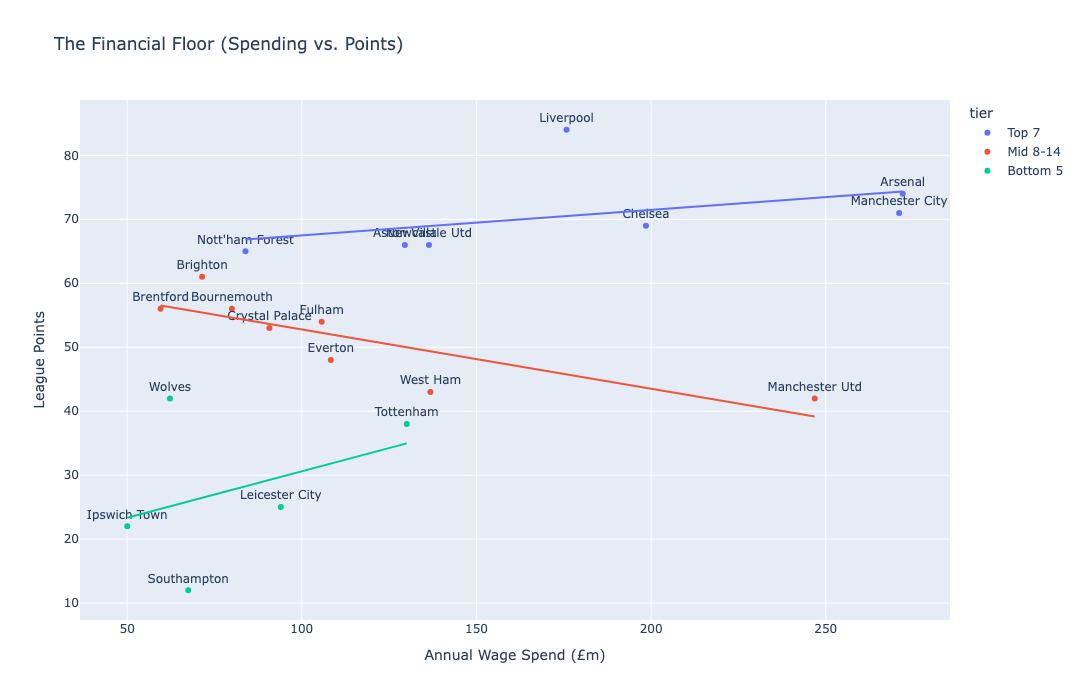

In [105]:
fig1 = px.scatter(master_df, x="annual_normalized", y="points", 
                 text="team", color="tier", trendline="ols",
                 title="The Financial Floor (Spending vs. Points)",
                 labels={"annual_normalized": "Annual Wage Spend (£m)", "points": "League Points"},
                 width=1000,height=700)
fig1.update_traces(textposition='top center')
fig1.show()
fig1.write_html('Spending_and_points_plot.html')

### Points ROI (Efficiency per £1m Spent) Plot
* A leaderboard of which clubs got the most league points for every million pounds spent on wages.
* It strips away the advantage of big budgets to show who the best recruiters and managers really are.
* The highest bars represent the most efficient clubs in the league, regardless of their final rank.

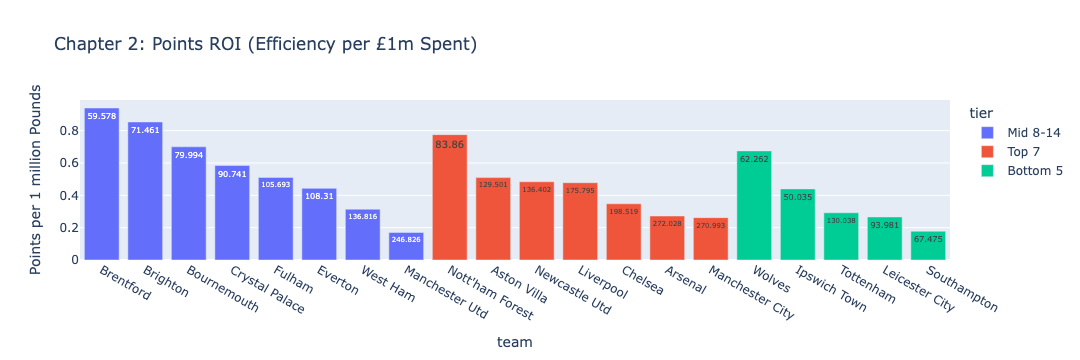

In [106]:
master_df['roi'] = master_df['points'] / master_df['annual_normalized']
fig2 = px.bar(master_df.sort_values("roi", ascending=False), 
             x="team", y="roi", color="tier",text='annual_normalized',
             title="Chapter 2: Points ROI (Efficiency per £1m Spent)",
             labels={"roi": "Points per 1 million Pounds"})

fig2.update_traces(textangle=0)
fig2.show()
fig2.write_html('ROI_and_points_efficiency.html')

### Defensive Involvment(midfield) Plot
* Compares how much defensive work the midfield does against the total goals conceded.
* It reveals a paradox: teams whose midfields "defend more" often concede more. It suggests these teams are stuck in their own half and lack control.
* Bottom-Left is a group of better teams that don't tackle much. Top-Right is the Midfielders that are over-worked and conceding.

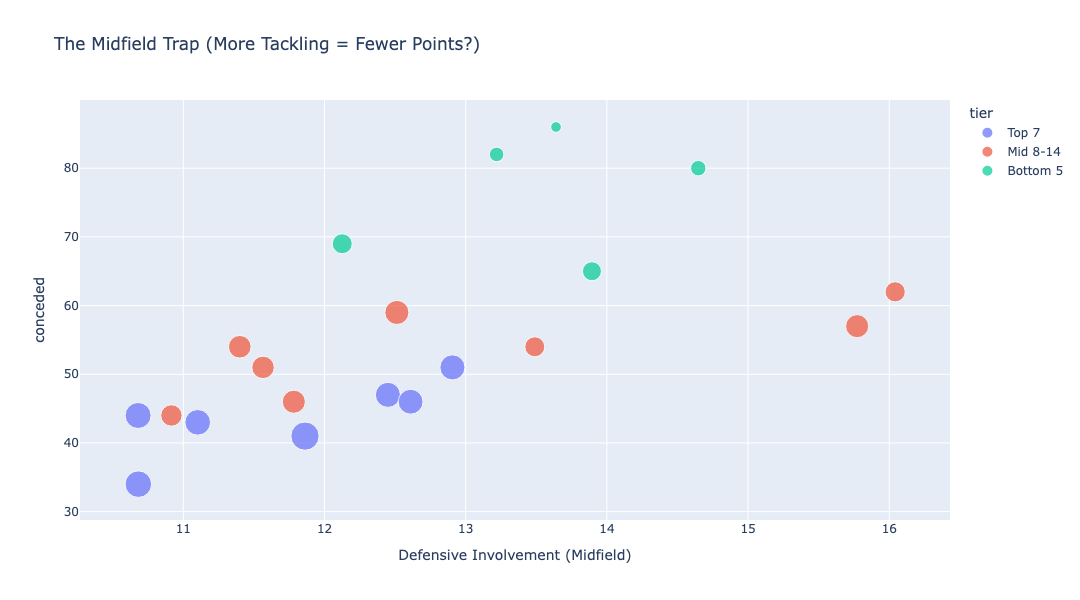

In [107]:
fig3 = px.scatter(master_df, x="defensive_involvement_midfield", y="conceded", 
                 color="tier", hover_name="team",width=1000,height=600,size='points',
                 title="The Midfield Trap (More Tackling = Fewer Points?)",
                 labels={"defensive_involvement_midfield": "Defensive Involvement (Midfield)"})

fig3.update_traces(textposition='top right')
fig3.show()
fig3.write_html('Defensive_Involvment_Mid_Plot.html')

### Defensive Progression vs Success Plot
* Shows how well a team’s defenders move the ball forward and how that impacts their total points.
* In modern football, attack starts at the back. Teams that can't progress from defense usually struggle to accumulate points.
* Look for teams with high Defense Ball Progression but low points; they are likely "playing out from the back" poorly.

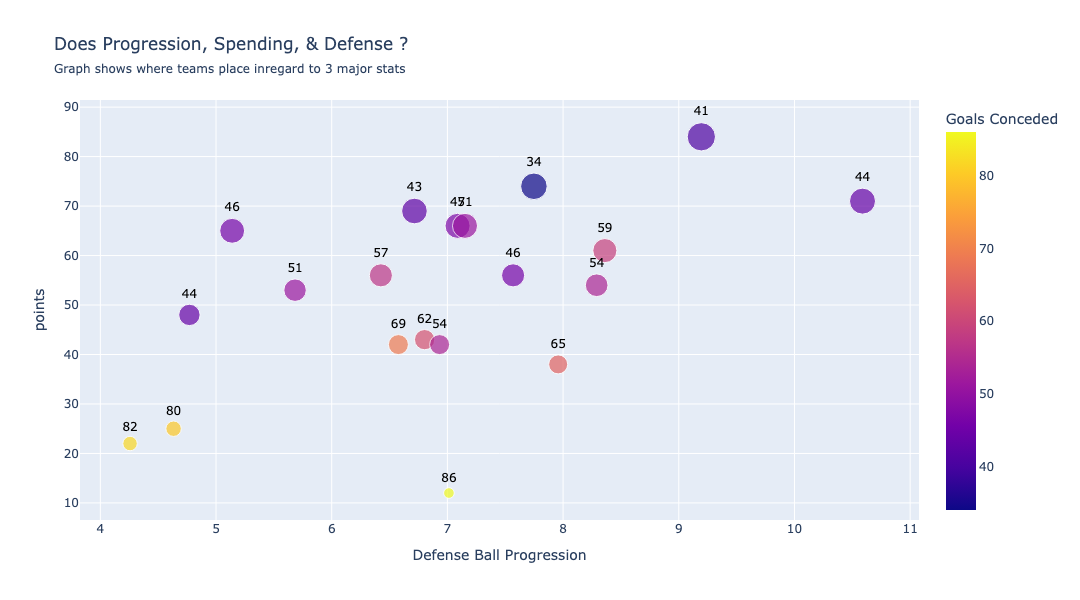

In [108]:
fig4 = px.scatter(master_df, x='ball_progression_defense', y='points', 
                         color='conceded', size='points',text='conceded',
                        hover_name='team',width=1000,height=600,
                        title='Does Progression, Spending, & Defense ?',
                         subtitle='Graph shows where teams place inregard to 3 major stats',
                        labels={'ball_progression_defense': 'Defense Ball Progression', 'conceded': 'Goals Conceded'})

fig4.update_traces(textfont_color='black', textposition='top center')
fig4.show()
fig4.write_html('defensive_prog_success.html')

### ball progression forward

In [98]:
fig = px.scatter(master_df,x='ball_progression_forward',y='defensive_involvement_midfield',
          color='tier',hover_name='team',size='goals',text='goals',width=1000,height=550,)

fig.update_traces(textposition='top center')
fig.show()

In [99]:
master_df['progressive_attack_score'] = (
    master_df['ball_progression_forward'] +
    master_df['attacking_involvement_forward'] +
    master_df['ball_progression_midfield'] +
    master_df['attacking_involvement_midfield']
)

In [100]:
master_df['control_index'] = (
    master_df['central_connectivity_midfield'] +
    master_df['ball_progression_midfield'] +
    master_df['ball_progression_defense']
)

In [101]:
master_df['defensive_reactivity'] = (
    master_df['defensive_involvement_midfield'] +
    master_df['defensive_involvement_defense']
)

### Progressive Attack Vs Points Plot
* Correlates a custom "Attacking Output" score (combining forward/midfield progression) against league standing.
* This combines several tactical metrics into one. It proves that verticality (moving forward) is the most reliable predictor of success.

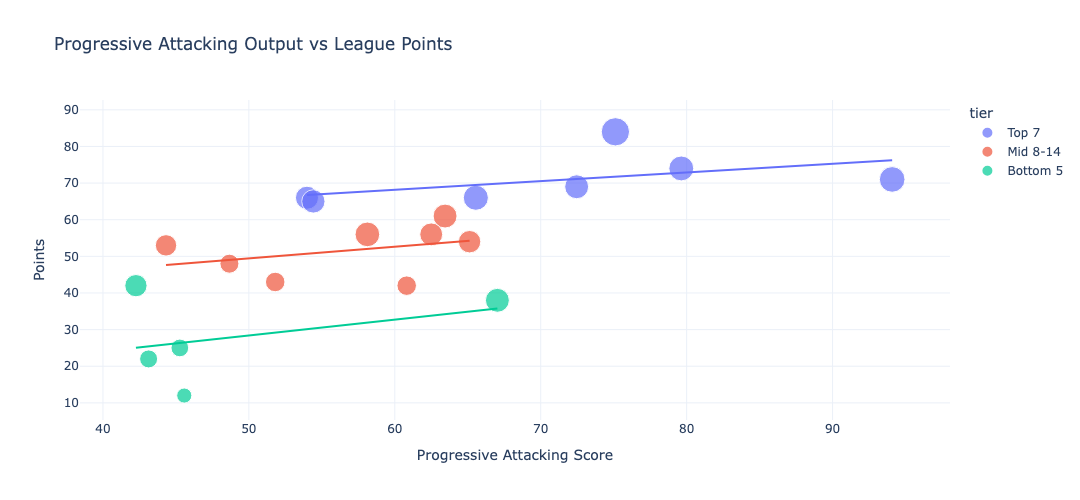

In [109]:
fig5 = px.scatter(master_df, x='progressive_attack_score', y='points',size='goals', 
            color='tier', width=1000, height=500, hover_name='team',trendline='ols',
            hover_data={
            'goals': True,
            'conceded': True,
            'possession': True,
            'annual_normalized': True,
            'progressive_attack_score': ':.2f'}, 
            title='Progressive Attacking Output vs League Points')

fig5.update_layout(xaxis_title='Progressive Attacking Score', yaxis_title='Points',
    template='plotly_white'
)

fig5.show()
fig5.write_html('Prog_attack_points_plot.html')

### Passing vs Carrying Plot
* Displays whether a team prefers to move the ball via passing or individual dribbling.
* It defines a team's playing strategy. Some teams are better at dangerous passes, while others rely on dribbelers. 
* Teams in the Top-Right are double-threats, they can hurt you with a pass or a run.

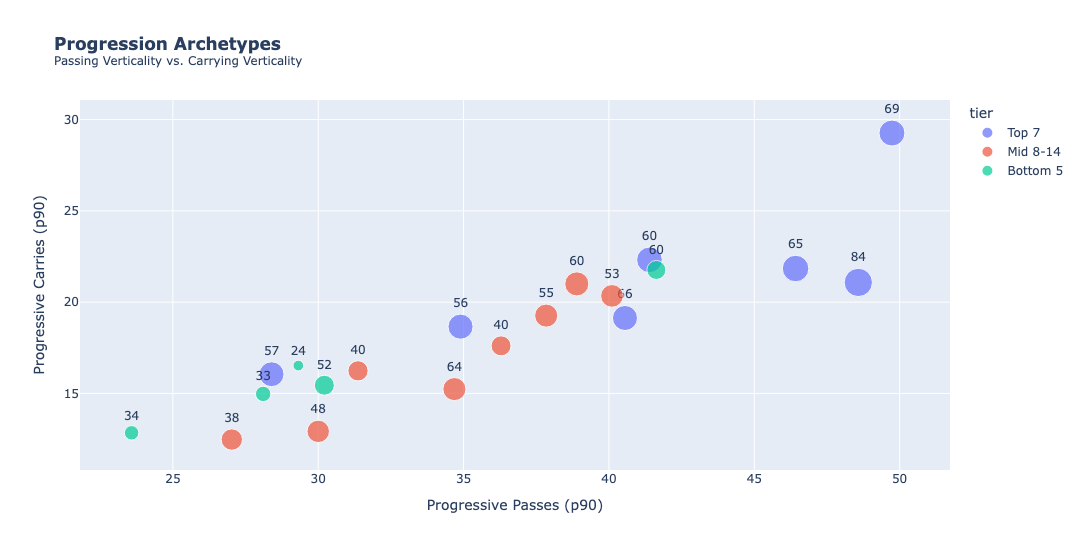

In [110]:
fig6 = px.scatter(master_df, x='progressive_passes_p90', y='progressive_carries_p90', 
                 text='goals', color='tier', size='points',width=1100,height=550,hover_data='team',
                 title='<b>Progression Archetypes</b><br><sup>Passing Verticality vs. Carrying Verticality</sup>',
                 labels={'progressive_passes_p90': 'Progressive Passes (p90)', 
                         'progressive_carries_p90': 'Progressive Carries (p90)'},
                 )
            
fig6.update_traces(textposition='top center')
fig6.show()
fig6.write_html('Passing_vs_carrying_plot.html')

### Control vs Progressive Passing Plot
* Measures how much a team controls the middle of the pitch versus how often they actually penetrate the final third.
* It identifies "Slower" teams (lots of middle touches, no forward passes) versus "Efficient" teams.
* High X-axis/Low Y-axis means a team is "Stagnant." High Y-axis regardless of X-axis means a team is "Direct."

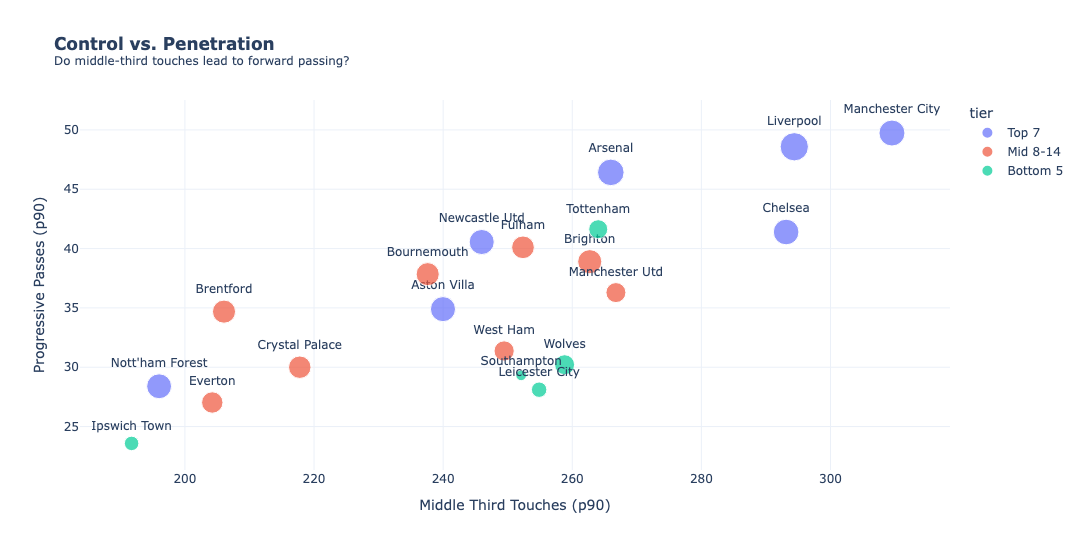

In [111]:
fig7 = px.scatter(master_df, x='middle_touches_p90', y='progressive_passes_p90', 
                 text='team', color='tier', size='points',width=1100,height=550,
                 title='<b>Control vs. Penetration</b><br><sup>Do middle-third touches lead to forward passing?</sup>',
                 labels={'middle_touches_p90': 'Middle Third Touches (p90)', 
                         'progressive_passes_p90': 'Progressive Passes (p90)'},
                 template='plotly_white')
fig7.update_traces(textposition='top center')
fig7.show()
fig7.write_html('Control_vs_prog_passing_plot.html')